In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
from collections import Counter
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
df=pd.read_csv("../input/credit-card-customers/BankChurners.csv")
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
         ,'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
c=df.groupby(['Attrition_Flag'])["CLIENTNUM"].agg('count')
fig=px.pie(values=c.values,names=['Non-attrited','Attrited'],title='% of Attrited Customers')
fig.show()

In [4]:
def percentage_analysis_of_categoricalindicator_and_attrition(indicator):
    c=df.groupby(['Attrition_Flag',indicator])['CLIENTNUM'].agg("count").reset_index()
    edu=df.groupby(indicator)['CLIENTNUM'].agg("count").reset_index()
    c=pd.merge(c,edu,on=indicator)
    c['percentage attirtion']=c['CLIENTNUM_x']/c['CLIENTNUM_y']
    fig=px.bar(c,x=indicator,y='percentage attirtion',color='Attrition_Flag',barmode='group')
    fig.show()

The function is to do find the relationship between categorical indicators and the attrition of credit card holders.

In [5]:
fig=percentage_analysis_of_categoricalindicator_and_attrition("Card_Category")

Not much relation is seen between attrition and the type of category. The platinum card holders attritioned slightly more than the other card holders.

In [6]:
percentage_analysis_of_categoricalindicator_and_attrition("Gender")

In [7]:
percentage_analysis_of_categoricalindicator_and_attrition('Marital_Status')

In [8]:
percentage_analysis_of_categoricalindicator_and_attrition('Income_Category')

There is no relation between the income level and attrition.

In [9]:
percentage_analysis_of_categoricalindicator_and_attrition("Education_Level")

**No single categorical variable itself does not have much correlation with attrition.**

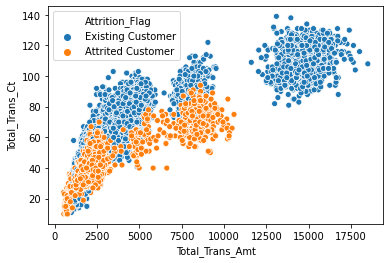

In [10]:
sns.scatterplot(data=df,x='Total_Trans_Amt',y='Total_Trans_Ct',hue='Attrition_Flag')

Here we can certainly see that those customers that have spent large amounts through the credit card are very less likely to atrrition. Those customers that have performed very less Transactions and have spent a small amount are more likely to attrition

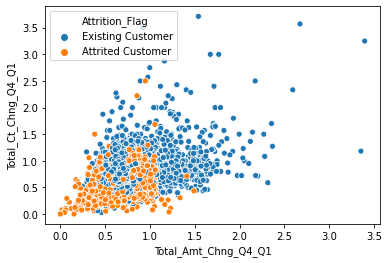

In [11]:
sns.scatterplot(data=df,x='Total_Amt_Chng_Q4_Q1',y='Total_Ct_Chng_Q4_Q1',hue='Attrition_Flag')

The customers which have done less number of transactions and also less amount in transactions in Q4 as compared to Q1 are more likely to show attrition.

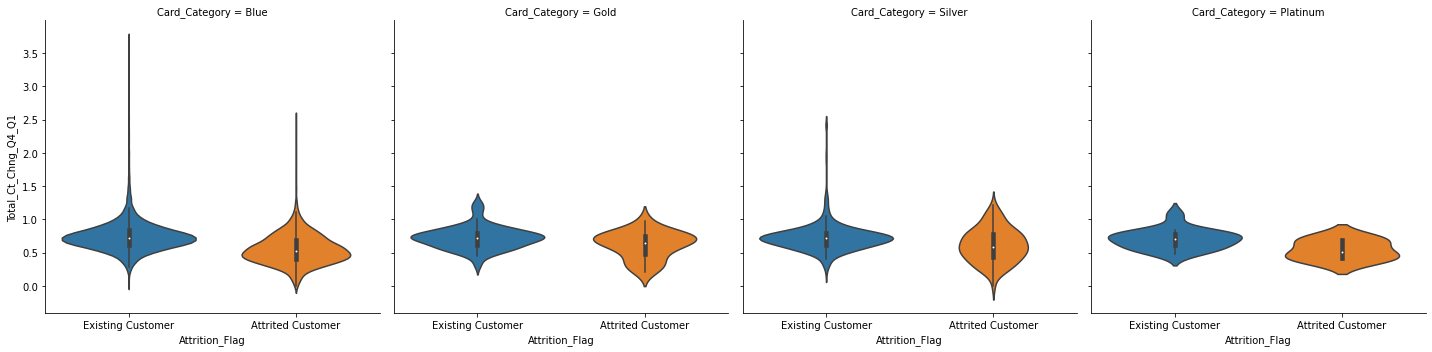

In [12]:
sns.catplot(data=df,y='Total_Ct_Chng_Q4_Q1',x='Attrition_Flag',col='Card_Category',kind='violin')

In [13]:
label=['A+','A','B','C',"D"]
df['Customer index']=pd.cut(df['Avg_Utilization_Ratio'],bins=[-0.001,0.2,0.4,0.6,0.8,1],precision=2,labels=label)

Dividing the customers based on the utilization ratio helps us find the more 'honest' customers that have a less revolving balance.

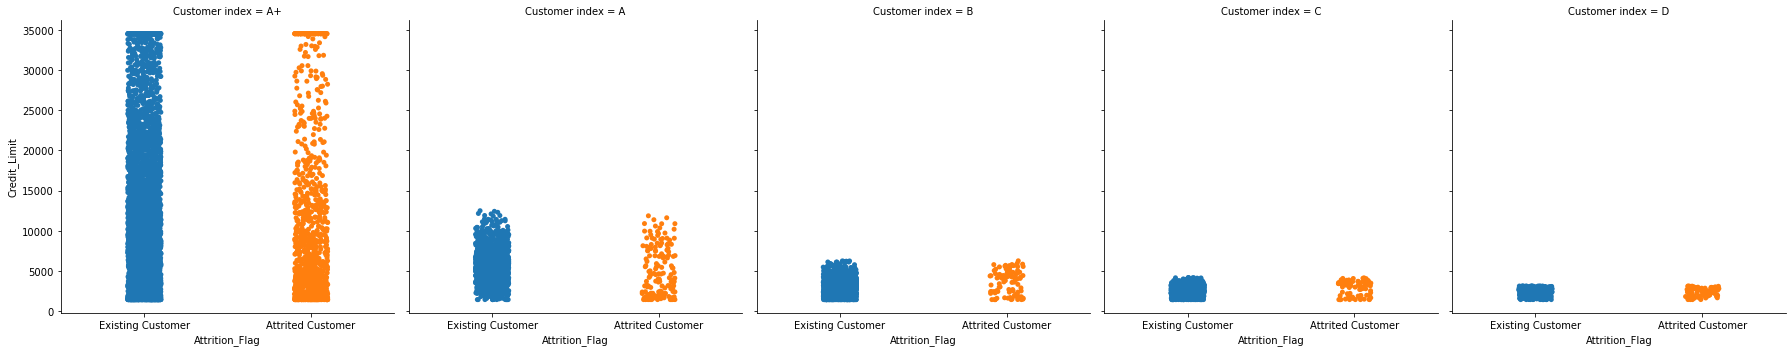

In [14]:
sns.catplot(data=df,col='Customer index',y='Credit_Limit',x='Attrition_Flag')

Credit Limit and avg utilization Ratio have a strong correlation as most banks use the utilization ratio to determine the customer index.A low utilization ratio means that the customer repays the amount borrowed . The less the utilization ratio the better. In the above figure also as the customer index decreases the credit limit also goes down.

In [15]:
df.drop(['Customer_Age','Gender','Education_Level','Marital_Status','Income_Category','Card_Category','Dependent_count',
        "Months_on_book",'Credit_Limit','Avg_Open_To_Buy','Contacts_Count_12_mon','Customer index','CLIENTNUM','Total_Revolving_Bal','Months_Inactive_12_mon','Total_Ct_Chng_Q4_Q1'],inplace=True,axis=1)
df.replace({'Attrition_Flag':{'Existing Customer':0,'Attrited Customer':1}},inplace=True)

From the scatter plots and bar plots it can be seen that the attrition does not depend on any of the categorical variables. Also, most numeric variables such as Credit Limit, Revolving Balance are accounted for in the Avg Utilization Ratio. The relationship of the customer also plays a vital role as if the Customer has debit card, account,etc. in the same bank they're less likely to change credit cards.

In [16]:
train=df.loc[:8000]  # 80% for training
test=df.loc[8000:]   # 20% for testing

In [17]:
X_train=train.drop('Attrition_Flag',axis=1)
X_test=test.drop('Attrition_Flag',axis=1)
y_train=train['Attrition_Flag']
y_test=test['Attrition_Flag']

In [18]:
def predict(df,model,labels):
    preds=[]
    for index,x in df.iterrows():
        if int(x['Total_Trans_Amt'])>=12500:   #if amount spent is more than 12500 we know the customer would 
            preds.append(0)                       #not change credit cards 
        else :
            i=np.array(x).reshape(1,-1)
            p=model.predict_proba(i)[0]
            if p[1]>0.30:
                preds.append(1)
            else :
                preds.append(0)
    print(len(preds))
    preds=pd.Series(preds)
    print("Accuracy = ",accuracy_score(labels,preds),'%')
    print("Precision = ",precision_score(labels,preds,pos_label=1),'%')
    print("Recall = ",recall_score(labels,preds,pos_label=1),"%")
    return preds
    

In the scatterplot it can be clearly seen that those accounts that have done higher amount of transactions and also spent more amount on those credit cards are not likely to change credit cards.

In [19]:
forest=RandomForestClassifier(max_depth=4,n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=4)

In [20]:
train_preds=predict(X_train,forest,y_train)

8001
Accuracy =  0.9281339832520935 %
Precision =  0.7101351351351352 %
Recall =  0.8780284043441938 %


In [21]:
preds=predict(X_test,forest,y_test)

2127
Accuracy =  0.8617771509167842 %
Precision =  0.9533333333333334 %
Recall =  0.3325581395348837 %


In [22]:
train.columns

Index(['Attrition_Flag', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
      dtype='object')